In [35]:
from IPython.display import HTML

HTML("""
<button id="code-show-switch-btn">スクリプトを非表示にする</button>

<script>
var code_show = true;

function switch_display_setting() {
    var switch_btn = $("#code-show-switch-btn");
    if (code_show) {
        $("div.input").hide();
        code_show = false;
        switch_btn.text("Mリーグデータレポート");
    }else {
        $("div.input").show();
        code_show = true;
        switch_btn.text("スクリプトを非表示にする");
    }
}

$("#code-show-switch-btn").click(switch_display_setting);
</script>
""")

# Mリーグデータレポート

In [4]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

lists = pd.read_html('https://m-league.jp/stats')
img_dir = 'image'
df = pd.DataFrame()

teams = ['drivens','EX','sakura','konami','abemas','sega_summy','raiden','u-next']
teams_semi = ['EX','sakura','konami','abemas','sega_summy','u-next']
teams_final = ['sakura','konami','abemas','sega_summy']
j = 0

for i in lists:
    data = i
    data = data.T
    data.columns = data.iloc[0]
    data = data[1:]
    data['チーム'] = teams[j]
    j+=1
    df = pd.concat([df,data])
df.to_csv('data/MLeague_stats' + datetime.date.today().strftime('%Y-%m-%d') + '.csv')
df.to_csv('data/MLeague_stats.csv')

# 概要
Mリーグ２０２１はサクラナイツが愁傷しました。  
沢崎選手が離脱する中、チームの結束をより強めて優勝を勝ち取りました。  
堀選手が7試合の出場と４チームの中でも最多で安定した成績でポイントを守り切りました。  
最終戦まで本当にどこが勝つかわからない、今までにない大接戦でした。  
ファイナルシーズンの12試合はどのような成績だったかデータをまとめます。  
本記事はファイナルシーズンのみの試合成績のデータをまとめた数値となります。  


# 目次:
* [1. Mリーガ成績表](#1)
* [2.試合数](#2)
* [3.チーム順位 ](#3)
* [4.ベストスコア](#4)
* [5.順位回数](#5)
* [6.アガリ率とトップ率](#6)
* [7.平均打点と放銃平均打点](#7)
* [8.さいごに](#8)

In [38]:
print('データ取得日：'+ datetime.date.today().strftime('%Y/%m/%d'))

データ取得日：2022/04/29


# 1. Mリーガ成績表 <a class="anchor" id="1"></a>
堀選手がファイナル１２戦中7試合の出場でポイントも52.1ポイントを稼いでトップになります。  
しかし、２位は白鳥選手で51.6ポイントとわずか0.5ポイント。  
意外にも最下位は多井選手の-89.0ポイント。  
ファイナルの成績は全１２戦で一人３試合程度の出場ですから、だいぶブレが大きくなります。  
しかし、その短期決戦で本来の実力がしっかり出ることが少ないながらも勝たなければならない難しさがあります。  
今回は堀選手が沢崎選手分も出て7試合の出場となりました。  
安定した成績で優勝に導きました。  
まさに主演堀！助演堀！監督堀！

In [39]:
df.sort_values('ポイント',ascending=False)

選手名,試合数,総局数,ポイント,平着,1位,2位,3位,4位,トップ率,連対率,ラス回避率,ベストスコア,平均打点,副露率,リーチ率,アガリ率,放銃率,放銃平均打点,チーム
堀 慎吾,7.0,92.0,52.1,2.28,2.0,2.0,2.0,1.0,0.28,0.57,0.85,47000.0,7137.5,0.16,0.2,0.17,0.04,6700.0,sakura
白鳥 翔,3.0,36.0,51.6,2.0,1.0,1.0,1.0,0.0,0.33,0.66,1.0,51400.0,7337.5,0.19,0.25,0.22,0.05,4750.0,abemas
日向 藍子,2.0,23.0,37.6,2.0,1.0,0.0,1.0,0.0,0.5,0.5,1.0,37500.0,7266.66,0.13,0.04,0.13,0.08,1950.0,abemas
魚谷 侑未,3.0,39.0,32.3,2.0,1.0,1.0,1.0,0.0,0.33,0.66,1.0,36100.0,7562.5,0.28,0.23,0.2,0.2,4662.5,sega_summy
近藤 誠一,5.0,63.0,31.6,2.4,1.0,2.0,1.0,1.0,0.2,0.6,0.8,58300.0,6190.9,0.15,0.31,0.17,0.04,4400.0,sega_summy
内川 幸太郎,3.0,33.0,29.3,2.33,1.0,0.0,2.0,0.0,0.33,0.33,1.0,45400.0,4120.0,0.24,0.24,0.15,0.0,0.0,sakura
伊達 朱里紗,3.0,35.0,15.8,2.33,1.0,1.0,0.0,1.0,0.33,0.66,0.66,40900.0,7366.66,0.17,0.22,0.17,0.08,10666.66,konami
茅森 早香,2.0,24.0,14.7,2.25,0.0,1.0,1.0,0.0,0.0,0.5,1.0,41100.0,7480.0,0.25,0.2,0.2,0.04,5200.0,sega_summy
東城 りお,2.0,24.0,2.9,2.5,1.0,0.0,0.0,1.0,0.5,0.5,0.5,34100.0,6380.0,0.16,0.33,0.2,0.12,10666.66,sega_summy
沢崎 誠,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,sakura


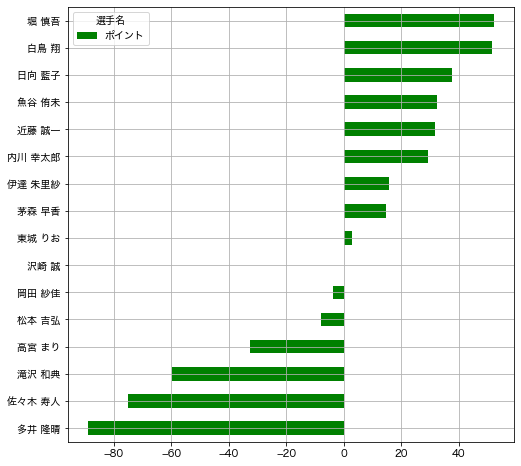

In [40]:
df[['ポイント']].sort_values('ポイント',ascending=True).plot(kind='barh',figsize=(8,8),color='g')
plt.grid()
plt.savefig(img_dir + '/player_point.png')

# 2. 試合数<a class="anchor" id="2"></a>
今シーズンのファイナルは出場数が満遍なく出場しています。  
シーズン、セミファイナルの成績やエースにかける起用などありますが、  
さまざまな人がファイナルの出場機会があり、この４チームの選手たちは素晴らしい経験をできたのではないでしょういか。  
来年の成長が楽しみですね。  

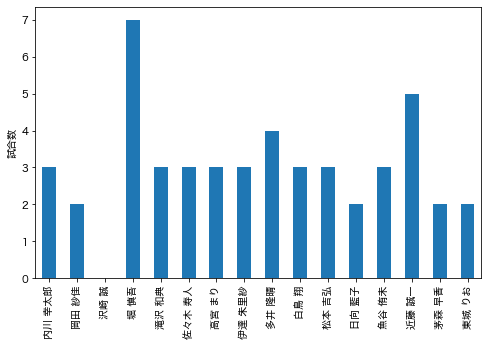

In [41]:
df['試合数'].plot(kind='bar',figsize=(8,5))
plt.ylabel('試合数')
plt.savefig(img_dir + '/game.png')

# 3.チーム成績 <a class="anchor" id="3"></a>
ファイナルシーズンのみのチーム成績はこちらになります。  
ファイナルシーズン最もポイントを稼いだのはセガサミーです。  
続いてサクラナイツで７７．７ポイント。  
ファイナルシーズンはセミファイナルまでの貯金を守った形で最後決まりました。  
コナミは４位が重なってしまい、チームカラーのハイリスク・ハイリターンが裏目に出た形です。  
全体としては、全チームが3回ずつ1着を取るという大接戦。  
決めては3着、4着数となった形です。  
サクラナイツが4着を1回のみでポイントを死守しました。  

In [50]:
mdf = df[['試合数','チーム', '総局数', 'ポイント', '1位', '2位', '3位', '4位']].groupby('チーム').sum()

In [51]:
mdf[['試合数', '総局数', 'ポイント', '1位', '2位', '3位', '4位']].sort_values('ポイント',ascending=False)

選手名,試合数,総局数,ポイント,1位,2位,3位,4位
チーム,,,,,,,
sega_summy,12.0,150.0,81.5,3.0,4.0,3.0,2.0
sakura,12.0,150.0,77.7,3.0,3.0,5.0,1.0
abemas,12.0,150.0,-7.8,3.0,2.0,4.0,3.0
konami,12.0,150.0,-151.4,3.0,2.0,1.0,6.0


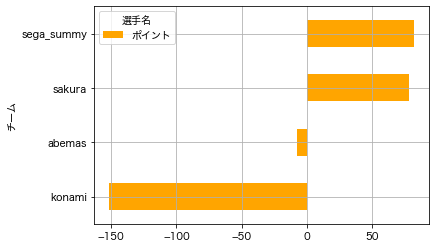

In [52]:
mdf[['ポイント']].sort_values('ポイント').plot(kind='barh',color = 'orange')
plt.grid()
plt.savefig(img_dir + '/team_point.png')

# 4. ベストスコア <a class="anchor" id="4"></a>
ベストスコアは５８３００のセガサミーです。  
大きいトップがないファイナルでとてもしまった試合が多かったように思えます。  
サクラナイツはベストスコア最下位と粘って勝ったことが伺えます。

In [45]:
df[['チーム','ベストスコア']].groupby('チーム').max().sort_values('ベストスコア',ascending = False)

選手名,ベストスコア
チーム,
sega_summy,58300.0
abemas,51400.0
konami,47100.0
sakura,47000.0


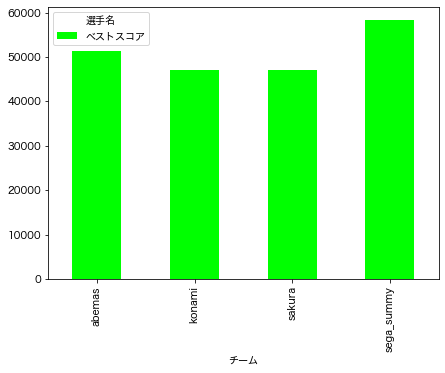

In [46]:
df[['チーム','ベストスコア']].groupby('チーム').max().plot(kind='bar',color='lime',figsize=(7,5))
plt.savefig(img_dir + '/best_score.png')

# 5. 順位回数 <a class="anchor" id="5"></a>
着順回数はコナミが4着が多い形になりました。  
そのほかのチームはほぼ同じような成績で本当にどこが優勝してもおかしくないファイナルでした。  
しかも、最終戦の最終局まで決まらない、ワンチャンabemasの大逆転もあるのでは？と思わせる展開でした。  
ドラマあるファイナルでした。

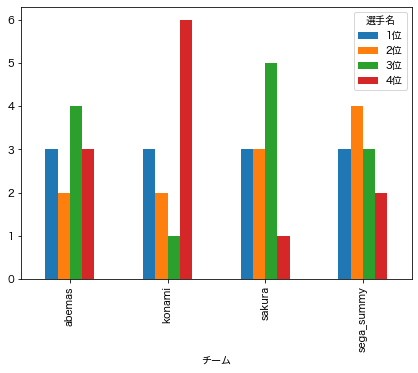

In [47]:
mdf[['1位', '2位', '3位', '4位']].plot(kind='bar',figsize=(7,5))
plt.savefig(img_dir + '/rank.png')

# 6. アガリ率と放銃率 <a class="anchor" id="6"></a>
アガリ率と放銃率の分布です。  
サクラナイツがアガリ率も放銃率も一番低いです。  
苦しい戦いを耐え抜いたことがデータにも表れています。  
コナミはアガれず放銃もしてしまったのがポイントを下げてしまいました。  
しかし、１位を取るためにリスクを負わなければならないので、一概に悪いとも言えません。  
この数値はひとつツモってアガるだけでも大きく変わります。  
次回は勝負どころであがれることを期待したいところです。  


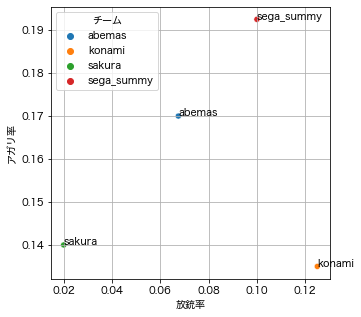

In [53]:
fig,ax = plt.subplots(figsize=(5,5))
mean_df = df[['チーム','ベストスコア','トップ率', '連対率','平均打点','放銃平均打点',
       'ラス回避率', '副露率', 'リーチ率', 'アガリ率', '放銃率']].groupby('チーム').mean()
sns.scatterplot(data=mean_df,x = '放銃率',y='アガリ率',hue='チーム')
for x, y, name in zip(mean_df['放銃率'], mean_df['アガリ率'], mean_df.index):
    plt.text(x, y, name)
plt.grid()
plt.savefig(img_dir + '/agari_houju.png')

# 7. 平均打点と放銃平均打点 <a class="anchor" id="7"></a>
平均打点、平均放銃打点両方とも最も低いのがサクラナイツです。  
セミファイナルまでのポイントを活かして最後まで耐え抜いたことが伺えます。  
コナミ、セガサミーは平均打点、平均法十打点も大きく、勝負に行ったことがわかります。  

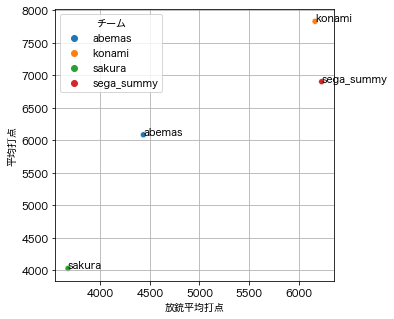

In [49]:
fig,ax = plt.subplots(figsize=(5,5))
sns.scatterplot(data=mean_df,x = '放銃平均打点',y='平均打点',hue='チーム')
for x, y, name in zip(mean_df['放銃平均打点'], mean_df['平均打点'], mean_df.index):
    plt.text(x, y, name)
plt.grid()
plt.savefig(img_dir + '/ave_point.png')

# 8. さいごに <a class="anchor" id="8"></a>
Mリーグ２０２１がついに終わりました。  
今年はサクラナイツが初優勝しました。  
来シーズンはどこが優勝するのか！？  
Mリーグ２０２２も楽しみです。